## Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [15]:
try:
    # for pyhton file .py
    PATH = Path(__file__).resolve().parent.parent
except NameError:
    # For Jupyter Notebook
    PATH = Path().resolve().parent.parent

with open(PATH / "config.json", "r") as f:
    VARIABLES = json.load(f)

# path of the folder with .parquet
folder_path = Path(VARIABLES["file_path_sampled_datasets"])

In [16]:
for file_path in folder_path.glob("*.parquet"):
    # create the name without the extension
    file_name = file_path.stem
    # sampled_datasets[file_name] = pd.read_parquet(file_path)
    print(f"DataFrame: {file_name}")

DataFrame: abandoned_carts
DataFrame: inventory
DataFrame: orders
DataFrame: regulars
DataFrame: users


In [18]:
abandoned_carts = pd.read_parquet(f"{folder_path}/abandoned_carts.parquet")
inventory = pd.read_parquet(f"{folder_path}/inventory.parquet")
orders = pd.read_parquet(f"{folder_path}/orders.parquet")
regulars = pd.read_parquet(f"{folder_path}/regulars.parquet")
users = pd.read_parquet(f"{folder_path}/users.parquet")

### Function for initial check

In [5]:
def print_initial_data_dataframe_column(column: pd.Series) -> None:
    try:
        is_null = column.isnull()
        duplicated = column.duplicated()
        column_types = column.apply(type).unique()

        print(f"///{column.name}///")
        print(column.info())
        print("/////")

        print(f"Total values: {column.count()}")
        print(
            f"Number of null values: {is_null.sum()} is the {is_null.mean() * 100 :.2f}% of data"
        )
        print(
            f"Duplicates Values: {duplicated.sum()} is the {duplicated.mean() * 100 :.2f}% of data"
        )
        print(f"Number of types: {len(column_types)} types: {column_types}")
        if len(column_types) == 1:

            if column_types == float or column_types == int:
                print(f"The mean: {column.mean()}")
                print(f"The standard deviation: {column.std()}")
                print(f"The min: {column.min()} The max: {column.max()} ")

        print(f"Number of values uniques: {len(column.unique())}")
        if len(column.unique()) < column.count() * 0.50:
            print(f"The unique values : {column.unique() :.2f} ")
        print("\n")
    except:
        print("Error")

## Checks initial to Tables

### User

users.parquet: Information about users.
user_id : Nothing - No changes   
user_segment: Two values, Top Up and Proposition, May be the categorization of pattern of shopping - No changes  
user_nuts1: Values of regions, there are 51 values empty - No changes  
*first_ordered_at: Change the type for pandas Timestamp  
*customer_cohort_month: Change the type for pandas Timestamp 

Only 325 lines have the next data, might be a survey.

#### Checks

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [11]:
# information about the columns
for column in users:
    print_initial_data_dataframe_column(users[column])

///user_id///
<class 'pandas.core.series.Series'>
Index: 4983 entries, 2160 to 3360
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
4983 non-null   object
dtypes: object(1)
memory usage: 77.9+ KB
None
/////
Total values: 4983
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'str'>]
Number of values uniques: 4983


///user_segment///
<class 'pandas.core.series.Series'>
Index: 4983 entries, 2160 to 3360
Series name: user_segment
Non-Null Count  Dtype 
--------------  ----- 
4983 non-null   object
dtypes: object(1)
memory usage: 77.9+ KB
None
/////
Total values: 4983
Number of null values: 0 is the 0.00% of data
Duplicates Values: 4981 is the 99.96% of data
Number of types: 1 types: [<class 'str'>]
Number of values uniques: 2
Error
///user_nuts1///
<class 'pandas.core.series.Series'>
Index: 4983 entries, 2160 to 3360
Series name: user_nuts1
Non-Null Count  Dtype 
--------------  ----- 
4932 non-nul

### Abandoned_carts

Abandoned_cart.parquet: If a user has added items to their basket but not bought them, we capture that information. Items that were abandoned are stored as a list in item_ids.

*Maybe Create a column with the numbers of products in the carts Len(variant_id)

In [12]:
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [13]:
for column in abandoned_carts:
    print_initial_data_dataframe_column(abandoned_carts[column])

///id///
<class 'pandas.core.series.Series'>
Index: 5457 entries, 0 to 70050
Series name: id
Non-Null Count  Dtype
--------------  -----
5457 non-null   int64
dtypes: int64(1)
memory usage: 85.3 KB
None
/////
Total values: 5457
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 21618808560053.117
The standard deviation: 402867859962.06647
The min: 12858560217220 The max: 22233846317188 
Number of values uniques: 5457


///user_id///
<class 'pandas.core.series.Series'>
Index: 5457 entries, 0 to 70050
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
5457 non-null   object
dtypes: object(1)
memory usage: 85.3+ KB
None
/////
Total values: 5457
Number of null values: 0 is the 0.00% of data
Duplicates Values: 2018 is the 36.98% of data
Number of types: 1 types: [<class 'str'>]
Number of values uniques: 3439


///created_at///
<class 'pandas.core.series.Series'>
Index: 5457 entries, 0 to

### Inventory

inventory.parquet: Some information about each item_id

variant_id: Nothing 
price: There are 71 products without price, value zero 
compare_at_price: There are 72 products without price, value zero    

In [14]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [15]:
for column in inventory:
    print_initial_data_dataframe_column(inventory[column])

///variant_id///
<class 'pandas.core.series.Series'>
RangeIndex: 1733 entries, 0 to 1732
Series name: variant_id
Non-Null Count  Dtype
--------------  -----
1733 non-null   int64
dtypes: int64(1)
memory usage: 13.7 KB
None
/////
Total values: 1733
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 36948799362316.49
The standard deviation: 2725674300769.723
The min: 33615294398596 The max: 40167931707524 
Number of values uniques: 1733


///price///
<class 'pandas.core.series.Series'>
RangeIndex: 1733 entries, 0 to 1732
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1733 non-null   float64
dtypes: float64(1)
memory usage: 13.7 KB
None
/////
Total values: 1733
Number of null values: 0 is the 0.00% of data
Duplicates Values: 1554 is the 89.67% of data
Number of types: 1 types: [<class 'float'>]
The mean: 6.30735141373341
The standard deviation: 7.107217663981021
The min: 0.0 The ma

### Orders

orders.parquet: An order history of customers. Each row is an order and the item_ids for the order are stored as a list in the item_ids column

id : nothing  
user_id : nothing  
created_at: there is one order is duplicate  
order_date: nothing  
user_order_seq: Nothing  
ordered_items: Should create a other column with the number of items in the order

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [18]:
for column in orders:
    print_initial_data_dataframe_column(orders[column])

///id///
<class 'pandas.core.series.Series'>
Index: 8773 entries, 10 to 64538
Series name: id
Non-Null Count  Dtype
--------------  -----
8773 non-null   int64
dtypes: int64(1)
memory usage: 137.1 KB
None
/////
Total values: 8773
Number of null values: 0 is the 0.00% of data
Duplicates Values: 0 is the 0.00% of data
Number of types: 1 types: [<class 'int'>]
The mean: 3684683902139.2095
The standard deviation: 414543651600.97345
The min: 2204073066628 The max: 4026732413060 
Number of values uniques: 8773


///user_id///
<class 'pandas.core.series.Series'>
Index: 8773 entries, 10 to 64538
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
8773 non-null   object
dtypes: object(1)
memory usage: 137.1+ KB
None
/////
Total values: 8773
Number of null values: 0 is the 0.00% of data
Duplicates Values: 3790 is the 43.20% of data
Number of types: 1 types: [<class 'str'>]
Number of values uniques: 4983


///created_at///
<class 'pandas.core.series.Series'>
Index: 8773 entries, 10

### Regulars

regulars.parquet: Users are allowed to specify items that they wish to buy regularly. This data gives the items each user has asked to get regularly, along with when they input that information

user_id: Nothing  
variant_id: Should create a other column with number of variant  
created_at: Nothing

In [291]:
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [22]:
for column in regulars:
    print_initial_data_dataframe_column(regulars[column])

///user_id///
<class 'pandas.core.series.Series'>
Index: 18105 entries, 3 to 37720
Series name: user_id
Non-Null Count  Dtype 
--------------  ----- 
18105 non-null  object
dtypes: object(1)
memory usage: 282.9+ KB
None
/////
Total values: 18105
Number of null values: 0 is the 0.00% of data
Duplicates Values: 16657 is the 92.00% of data
Number of types: 1 types: [<class 'str'>]
Number of values uniques: 1448
Error
///variant_id///
<class 'pandas.core.series.Series'>
Index: 18105 entries, 3 to 37720
Series name: variant_id
Non-Null Count  Dtype
--------------  -----
18105 non-null  int64
dtypes: int64(1)
memory usage: 282.9 KB
None
/////
Total values: 18105
Number of null values: 0 is the 0.00% of data
Duplicates Values: 16262 is the 89.82% of data
Number of types: 1 types: [<class 'int'>]
The mean: 35119886149708.234
The standard deviation: 2171236598474.3447
The min: 33615268282500 The max: 40133621973124 
Number of values uniques: 1843
Error
///created_at///
<class 'pandas.core.serie

## hypothesis testing

### Type of users who abandon more cars

<Axes: ylabel='n_abandoned_cars_by_users_segment'>

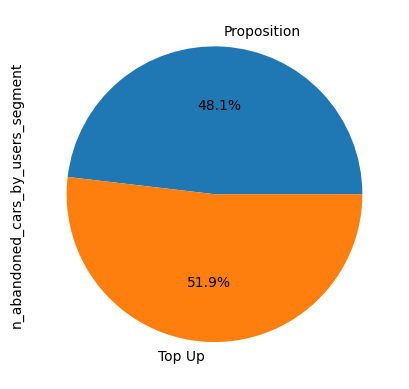

In [20]:
# Users who abandon cars: User segment which have more abandoned carts
# Count number of carts abandoned
n_abandoned_cars = (
    abandoned_carts.groupby("user_id")["id"]
    .nunique()
    .reset_index()
    .rename(columns={"id": "n_abandoned_cars"})
)

# merge which the users dataframe and user segment
n_abandoned_cars_by_users_segment = (
    users.merge(n_abandoned_cars, on="user_id", how="inner")
    .groupby("user_segment")["n_abandoned_cars"]
    .sum()
    .reset_index()
    .rename(columns={"n_abandoned_cars": "n_abandoned_cars_by_users_segment"})
)
n_abandoned_cars_by_users_segment.set_index("user_segment")[
    "n_abandoned_cars_by_users_segment"
].plot(kind="pie", autopct="%1.1f%%")

# There a similar proporsion for the type of user who abandoned cars

### Number of regulars of each user segment

<Axes: xlabel='user_segment'>

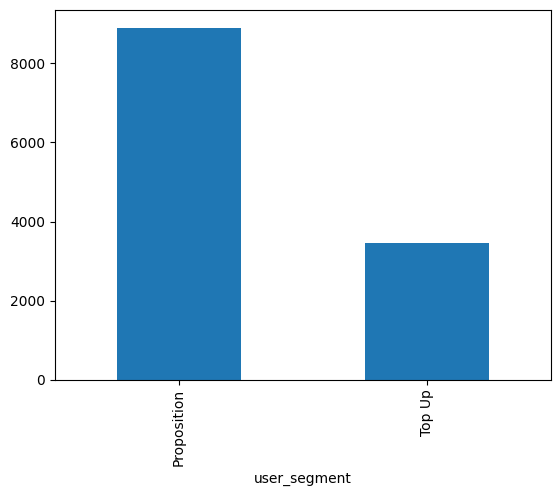

In [ ]:
# count products regular by user id
n_products_regulars = (
    regulars.groupby("user_id")["variant_id"]
    .nunique()
    .reset_index()
    .rename(columns={"variant_id": "n_products_regulars"})
)

# n regulars by user_segment
users = users.merge(n_products_regulars, on="user_id", how="left").fillna(
    {"n_products_regulars": 0}
)
users.groupby("user_segment")["n_products_regulars"].sum().plot(kind="bar")

# the users "proposition" have more regulars products

### Numbers of products abandoned vs purchased

In [29]:
# number products abandoned
n_abandoned = (
    abandoned_carts["variant_id"]
    .explode("variant_id")
    .value_counts()
    .rename("n_abandoned")
)
# number products purchased
n_purchased = (
    orders["ordered_items"]
    .explode("ordered_items")
    .value_counts()
    .rename("n_purchased")
)
n_purchased.index = n_purchased.index.rename("variant_id")

inventory = inventory.merge(n_abandoned, on="variant_id", how="inner")
inventory = inventory.merge(n_purchased, on="variant_id", how="inner")

In [ ]:
# relation_purchased_vs_abandoned: products almost always are purchased and almost never abandoned
inventory["relation_buy_vs_abandoned"] = (
    inventory["n_purchased"] / (inventory["n_purchased"] + inventory["n_abandoned"])
) * 100
relation_buy_vs_abandoned = inventory.sort_values(
    by="relation_buy_vs_abandoned", ascending=False
)
relation_buy_vs_abandoned[
    ["product_type", "relation_buy_vs_abandoned", "price", "compare_at_price", "vendor"]
]

# List of the products more purschased without abandoned

,product_type,relation_buy_vs_abandoned,price,compare_at_price,vendor
807,tins-packaged-foods,97.826087,1.36,1.59,biona
385,cleaning-products,97.222222,5.19,5.25,ecoforce
446,dog-food,96.875000,4.89,4.98,bakers
852,bath-shower-gel,96.875000,5.79,5.92,faithinnature
456,haircare,96.774194,7.49,7.50,lovebeautyplanet
...,...,...,...,...,...
550,superfoods-supplements,25.000000,23.99,24.00,funktionalfoods
746,washing-capsules,25.000000,9.99,10.00,persil
122,home-baking,25.000000,14.99,17.08,various
868,dental,20.000000,4.99,5.99,brushd


### Numbers of pets, babies or children

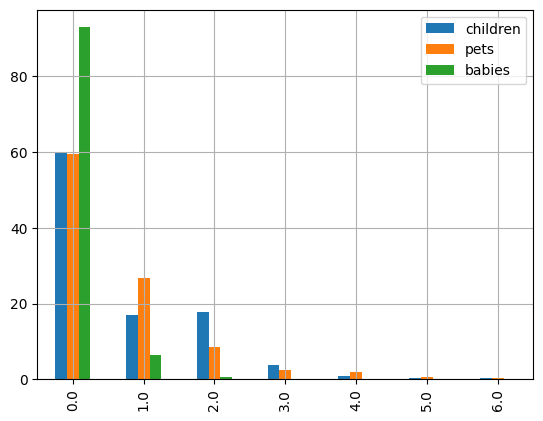

In [33]:
# count of each stadistics
n_children = users.count_children.value_counts(normalize=True).sort_index() * 100
n_pets = users.count_pets.value_counts(normalize=True).sort_index() * 100
n_babies = users.count_babies.value_counts(normalize=True).sort_index() * 100

n_children_pets_babies = pd.DataFrame(
    {"children": n_children, "pets": n_pets, "babies": n_babies}
)
n_children_pets_babies.plot(kind="bar").grid()

# most users do not have children, pets or babies

In [28]:
for column in n_children_pets_babies:
    print(
        f"{n_children_pets_babies[column][n_children_pets_babies.index>=1].sum() :.2f}% of poblation has {column}"
    )

40.00% of poblation has children
40.62% of poblation has pets
7.08% of poblation has babies


In [78]:
no_babies_no_pets = users[
    (users["count_babies"] == 0)
    & (users["count_pets"] == 0)
    & (users["count_children"] == 0)
]
no_babies_no_pets
porcentaje = (
    len(no_babies_no_pets) / len(users[pd.notna(users["count_people"])])
) * 100

print(
    f"The percentage of people without babies, children and pets is: {porcentaje:.2f}%"
)

The percentage of people without babies, children or pets is: 38.77%


### User Segment by Region 

<Axes: xlabel='user_nuts1'>

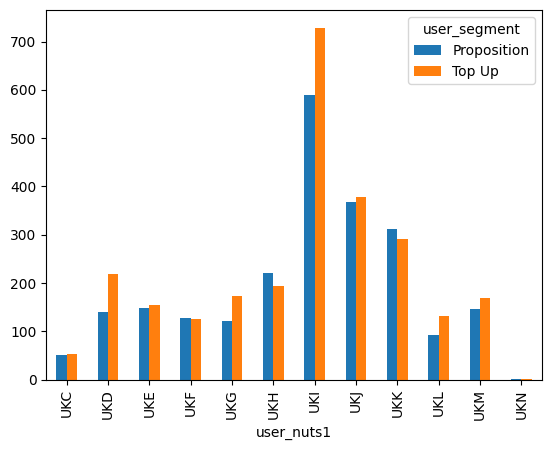

In [ ]:
# The user segment by region
pd.crosstab(users["user_nuts1"], users["user_segment"]).plot(kind="bar")

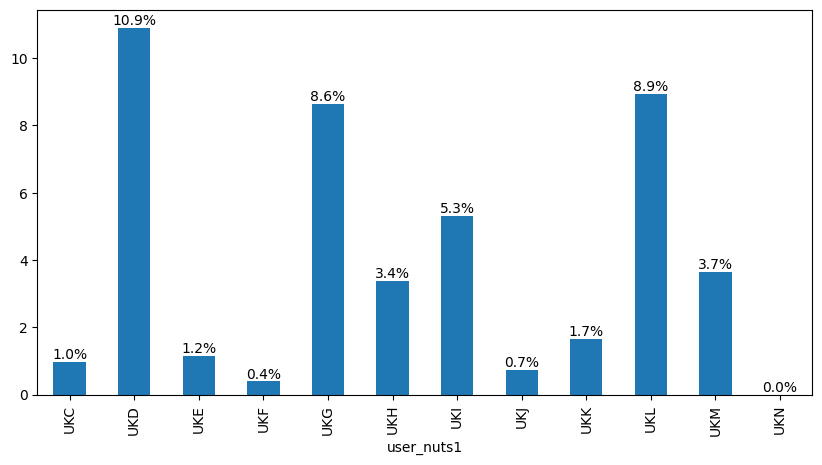

In [ ]:
# The porcentual diferent bewteen the user segment by region
region = pd.crosstab(users["user_nuts1"], users["user_segment"])

fig, ax = plt.subplots(figsize=(10, 5))

(
    (
        abs(region["Proposition"] - region["Top Up"])
        / ((region["Proposition"] + region["Top Up"]))
        / 2
    )
    * 100
).plot(kind="bar")

ax.bar_label(ax.containers[0], fmt="%.1f%%")

plt.show()

#### number of Regulars per each product

In [331]:
# There are some producs aren't regulars
inventory_with_regulars = inventory.merge(
    regulars.value_counts("variant_id"), on="variant_id", how="left"
).rename(columns={"count": "n_regulars"})
inventory_with_regulars.isna().sum()

variant_id            0
price                 0
compare_at_price      0
vendor                0
product_type          0
tags                  0
n_regulars          448
dtype: int64

In [ ]:
# show the products that are the most regulars
products_regulars = inventory_with_regulars.dropna()
products_regulars.sort_values("n_regulars", ascending=False)

,variant_id,price,compare_at_price,vendor,product_type,tags,n_regulars
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]",253.0
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]",127.0
139,34370915041412,4.99,6.60,mutti,tins-packaged-foods,"[pasta-pizza-sauce, tinned-tomatoes-puree-pass...",112.0
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],105.0
251,33667282436228,3.99,4.00,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, kitchen-roll, vegan]",101.0
...,...,...,...,...,...,...,...
1201,39483175534724,4.49,5.39,gsk,superfoods-supplements,[vitamins-supplements],1.0
570,34371968532612,11.99,15.54,ellaskitchen,baby-toddler-food,"[b-corp, organic, pouches, stage-1-4-to-6-months]",1.0
362,39309575618692,20.49,20.59,famousgrouse,spirits-liqueurs,[spirits-liqueurs],1.0
1478,39462725615748,9.99,10.00,venus,shaving-grooming,[razors-blades],1.0


<Axes: xlabel='product_type'>

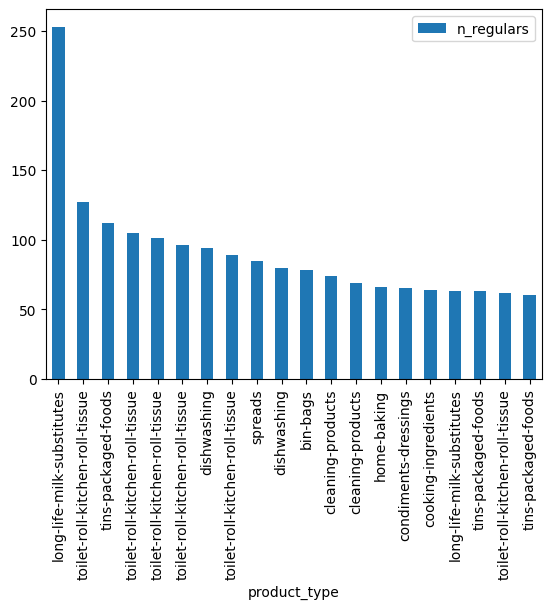

In [ ]:
(
    inventory_with_regulars[["product_type", "n_regulars"]]
    .sort_values("n_regulars", ascending=False)
    .set_index("product_type")
    .head(20)
    .plot(kind="bar")
)

#### The most products sold

In [79]:
# The most products sold
n_products_sold = (
    orders.explode("ordered_items")
    .groupby("ordered_items")
    .size()
    .reset_index(name="n_sold")
)
n_products_sold
n_products_sold = n_products_sold.rename(columns={"ordered_items": "variant_id"})
inventory_sales = inventory.merge(n_products_sold, on="variant_id")
inventory_sales.sort_values("n_sold", ascending=False).head(3)

,variant_id,price,compare_at_price,vendor,product_type,tags,n_abandoned_x,n_purchased_x,n_abandoned_y,n_purchased_y,n_abandoned,n_purchased,relation_buy_vs_abandoned,n_sold
59,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]",608,4487,608,4487,608,4487,88.066732,4487
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll],478,1133,478,1133,478,1133,70.328988,1133
765,34284950356100,1.99,3.00,fairy,dishwashing,"[discontinue, swapped, washing-up-liquid]",409,954,409,954,409,954,69.992663,954


<Axes: xlabel='product_type'>

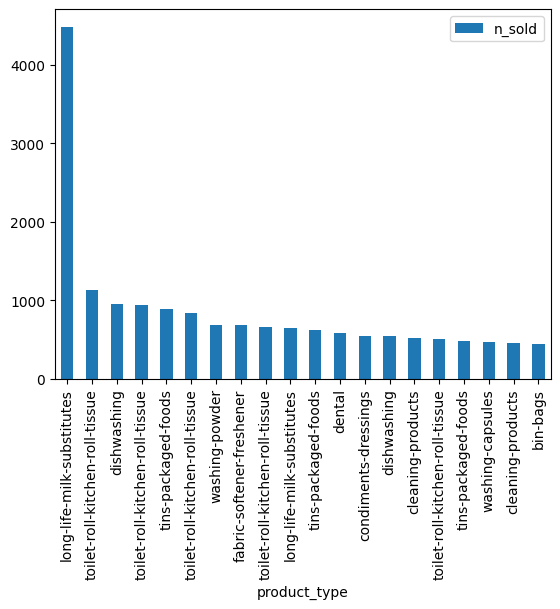

In [387]:
inventory_sales[["product_type", "n_sold"]].sort_values(
    "n_sold", ascending=False
).set_index("product_type").head(20).plot(kind="bar")

<Axes: xlabel='vendor'>

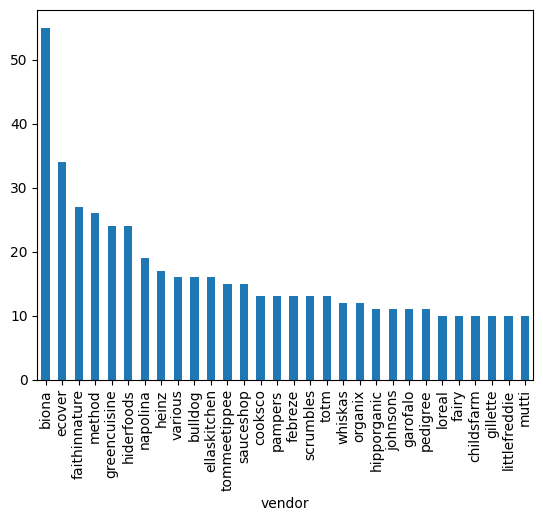

In [390]:
# the most vendedor
inventory_sales["vendor"].value_counts().head(30).plot(kind="bar")

<Axes: xlabel='product_type'>

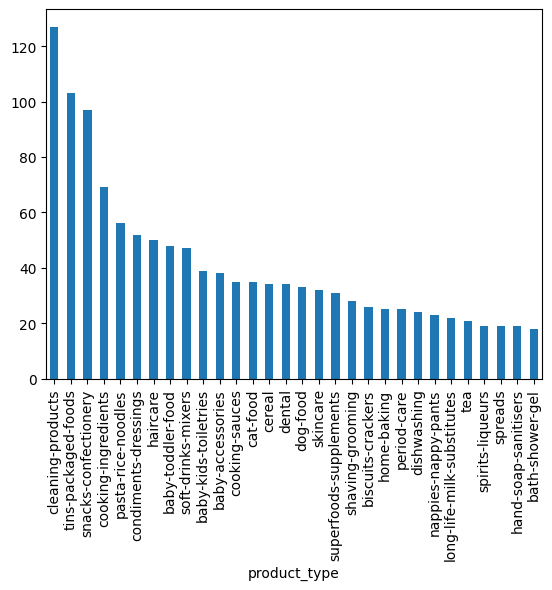

In [393]:
inventory_sales["product_type"].value_counts().head(30).plot(kind="bar")

In [395]:
# porcentual user with more than 1 order
orders.loc[
    lambda x: x.user_order_seq > 1
].user_id.nunique() / orders.user_id.nunique() * 100

28.316275336142887

#### f

<Axes: xlabel='user_order_seq'>

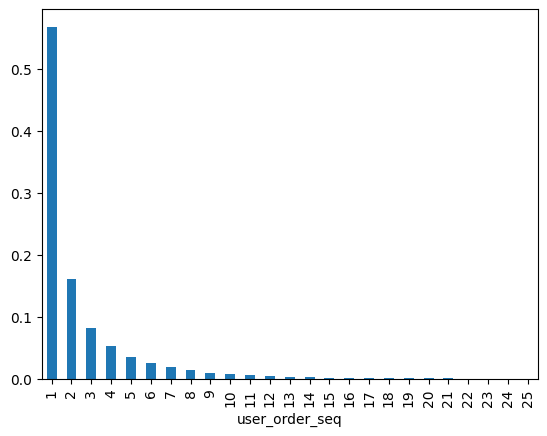

In [ ]:
# number of sequencial order
orders["user_order_seq"].value_counts(normalize=True).plot(kind="bar")

In [ ]:
# products boufht without produccts in inventory
products_order = orders.explode("ordered_items").rename(
    {"ordered_items": "variant_id"}, axis=1
)
products_order = products_order.merge(inventory, on="variant_id", how="left")
products_order
100 * products_order.price.isna().sum() / products_order.shape[0]

15.694066210933881

# Insights
* Only 325 lines have the next data, might be a survey. This data is distributed throughout the entire data period.
* The percentage of people without babies, children or pets is: 38.77%
* The region UKI are the most number of users, and the region UKD have the more proportional difference between the user_segment with 10.9%
* There are 448 products that are not regulars
* Long-life milk substitutes are the best-selling product
* Bioma is the biggest vendor
* 28% of users had more than one order sequence
* There are 15.7% products bought without products in inventory**